In [159]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/anish/Downloads/listings.csv')

In [4]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20240805060347,2024-08-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.27
1,5136,https://www.airbnb.com/rooms/5136,20240805060347,2024-08-05,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.75,4.75,NaN,t,1,1,0,0,0.03
2,6848,https://www.airbnb.com/rooms/6848,20240805060347,2024-08-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.68,4.57,NaN,f,1,1,0,0,1.04
3,6872,https://www.airbnb.com/rooms/6872,20240805060347,2024-08-05,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),A charming month-to-month home away from home ...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.04
4,6990,https://www.airbnb.com/rooms/6990,20240805060347,2024-08-05,city scrape,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",https://a0.muscache.com/pictures/be6cd5b3-9295...,16800,...,4.95,4.85,4.84,NaN,f,1,0,1,0,1.37


In [8]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## **1. Properties Table**

In [11]:
properties_df = data[['id', 'name', 'host_id', 'neighbourhood_cleansed', 'room_type', 'price', 'availability_365']].head(50).copy()

In [13]:
properties_df = properties_df.rename(columns={
    'id': 'property_id',
    'host_id': 'owner_id',
    'neighbourhood_cleansed': 'location',
    'price': 'listing_price'
})

In [15]:
properties_df['occupancy_rate'] = 1 - (properties_df['availability_365'] / 365)

In [17]:
properties_df['listing_price'] = properties_df['listing_price'].str.replace('$', '').str.replace(',', '').astype(float)

In [19]:
properties_df = properties_df[['property_id', 'name', 'owner_id', 'location', 'room_type', 'listing_price', 'occupancy_rate']]

In [21]:
nan_property_ids = properties_df[properties_df['listing_price'].isna()]['property_id']
print(nan_property_ids)

5      7064
12    65615
15    11943
27    25406
33    15396
34    68253
44    71384
45    72190
Name: property_id, dtype: int64


In [23]:
price_updates = {
    71384: 229.0,
    72190: 110.0,
    25406: 80.0,
    7064: 150.0,
    65615: 130.0,
    11943: 150.0,
    68253: 55.0,
    15396: 400.0
} #Taken from the calendar dataset, which does not have any missing price values

# Update the price column in properties_df where property_id matches
properties_df['listing_price'] = properties_df.apply(
    lambda row: price_updates[row['property_id']] if row['property_id'] in price_updates else row['listing_price'],
    axis=1
)

In [87]:
property_ids_to_search = [5, 7064, 12, 65615, 15, 11943, 27, 25406, 33, 15396, 34, 68253, 44, 71384, 45, 72190]

matching_prices = filtered_data[filtered_data['listing_id'].isin(property_ids_to_search)][['listing_id', 'price']].drop_duplicates()
matching_prices

,listing_id,price
5253,71384,229.0
5618,72190,110.0
7023,25406,80.0
23221,7064,150.0
58575,65615,130.0
59469,11943,150.0
64304,68253,55.0
138529,15396,400.0


In [27]:
properties_df.head()

,property_id,name,owner_id,location,room_type,listing_price,occupancy_rate
0,2595,Skylit Midtown Castle,2845,Midtown,Entire home/apt,240.0,0.200000
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Sunset Park,Entire home/apt,215.0,0.726027
2,6848,Only 2 stops to Manhattan studio,15991,Williamsburg,Entire home/apt,81.0,0.536986
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,East Harlem,Private room,65.0,0.000000
4,6990,UES Beautiful Blue Room,16800,East Harlem,Private room,65.0,0.347945


In [29]:
properties_df.to_csv("properties.csv", index=False)

## **2. Owners Table**

In [32]:
owners_df = data[[
    'host_id',
    'host_name',
    'host_url'
]].head(50).copy()

owners_df.rename(columns={
    'host_id': 'owner_id',
    'host_name': 'owner_name',
    'host_url': 'contact_info'
}, inplace=True)

owners_df = owners_df.drop_duplicates(subset='owner_id')

In [34]:
owners_df.head()

,owner_id,owner_name,contact_info
0,2845,Jennifer,https://www.airbnb.com/users/show/2845
1,7378,Rebecca,https://www.airbnb.com/users/show/7378
2,15991,Allen & Irina,https://www.airbnb.com/users/show/15991
3,16104,Kae,https://www.airbnb.com/users/show/16104
4,16800,Cyn,https://www.airbnb.com/users/show/16800


In [36]:
owners_df.to_csv("owners.csv", index = False)

## **3. Users Table**

In [39]:
data_reviews = pd.read_csv('/Users/anish/Downloads/reviews.csv')

In [40]:
users_df = data_reviews.drop_duplicates(subset=['reviewer_id', 'reviewer_name'])[['reviewer_id', 'reviewer_name']].head(50).copy()

In [41]:
users_df.columns = ['user_id', 'user_name']

In [42]:
users_df['user_rating'] = np.random.choice([0, 1, 2, 3, 4, 5], size=len(users_df))

In [43]:
users_df['contact_info'] = ['(' + str(random.randint(200,999)) + ') ' + 
                            str(random.randint(200,999)) + '-' + 
                            str(random.randint(1000,9999)) for _ in range(len(users_df))]

In [44]:
users_df.head()

,user_id,user_name,user_rating,contact_info
0,50679,Jean,3,(383) 458-2607
1,53267,Cate,4,(562) 627-7913
2,38960,Anita,1,(324) 589-9275
3,71130,Kai-Uwe,0,(384) 867-9930
4,117113,Alicia,5,(748) 362-5923


In [51]:
users_df.to_csv("users.csv", index = False)

## **4. Reviews Table**

In [54]:
data_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [56]:
data_reviews.rename(columns={"listing_id": "property_id","id": "review_id", "date": "review_date"}, inplace=True)

In [58]:
filtered_reviews = data_reviews[data_reviews["property_id"].isin(properties_df["property_id"])]

In [60]:
data_filtered = data[[
    "id", "review_scores_cleanliness", "review_scores_communication",
    "review_scores_location", "review_scores_rating"
]].rename(columns={
    "id": "property_id",
    "review_scores_cleanliness": "rating_cleanliness",
    "review_scores_communication": "rating_host",
    "review_scores_location": "rating_location",
    "review_scores_rating": "rating_overall"
})

In [62]:
reviews_df = pd.merge(
    filtered_reviews,
    data_filtered,
    on="property_id",
    how="inner"
)

In [64]:
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

In [66]:
reviews_df = reviews_df.rename(columns = {"reviewer_id": "user_id"})

In [68]:
reviews_df = reviews_df.drop(columns=['reviewer_name'])

In [70]:
reviews_df['review_id'] = range(1, len(reviews_df) + 1)
reviews_df

,property_id,review_id,review_date,user_id,comments,rating_cleanliness,rating_host,rating_location,rating_overall
0,2595,1,2009-11-21,50679,Notre séjour de trois nuits.\r<br/>Nous avons ...,4.63,4.80,4.81,4.68
1,2595,2,2009-12-05,53267,Great experience.,4.63,4.80,4.81,4.68
2,2595,3,2009-12-10,38960,I've stayed with my friend at the Midtown Cast...,4.63,4.80,4.81,4.68
3,2595,4,2010-04-09,71130,"We've been staying here for about 9 nights, en...",4.63,4.80,4.81,4.68
4,2595,5,2010-05-25,117113,We had a wonderful stay at Jennifer's charming...,4.63,4.80,4.81,4.68
...,...,...,...,...,...,...,...,...,...
6810,16821,6811,2024-06-26,7779617,"Great place to stay in NYC. Cool decor, quiet ...",4.46,4.88,4.90,4.73
6811,16821,6812,2024-06-28,526417867,Lovely place. Just a little bit dark and quite...,4.46,4.88,4.90,4.73
6812,16821,6813,2024-07-06,21407958,I absolutely loved my stay here! The bed is co...,4.46,4.88,4.90,4.73
6813,16821,6814,2024-07-07,169217966,HIGHLY RECOMMEND,4.46,4.88,4.90,4.73


In [72]:
reviews_df = reviews_df[reviews_df['user_id'].isin(users_df['user_id'])]

In [74]:
reviews_df.to_csv("reviews1.csv", index = False)

## **5. Bookings Table**

In [77]:
calendar_data = pd.read_csv('/Users/anish/Downloads/calendar.csv')
calendar_data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2024-08-05,f,$225.00,NaN,30,1125
1,2595,2024-08-06,f,$225.00,NaN,30,1125
2,2595,2024-08-07,f,$225.00,NaN,30,1125
3,2595,2024-08-08,f,$225.00,NaN,30,1125
4,2595,2024-08-09,f,$225.00,NaN,30,1125


In [78]:
filtered_data = calendar_data[calendar_data['listing_id'].isin(properties_df['property_id'])]

In [79]:
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

In [80]:
filtered_data['price'] = filtered_data['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [81]:
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

In [89]:
filtered_data = filtered_data.sort_values(['listing_id', 'date'])

# Create a unique group ID for consecutive booked days
filtered_data['group_id'] = (
    (filtered_data['available'] != 'f') |  # Start a new group if availability changes
    (filtered_data['date'].diff() > pd.Timedelta(days=1)) |  # Start a new group if the date gap is more than 1 day
    (filtered_data['listing_id'].diff() != 0)  # Start a new group if the listing ID changes
).cumsum()

# Filter for only booked days
booked_days = filtered_data[filtered_data['available'] == 'f']

# Group by `listing_id` and `group_id` to aggregate bookings
bookings = booked_days.groupby(['listing_id', 'group_id']).agg(
    check_in_date=('date', 'min'),
    check_out_date=('date', 'max'),
    nights_booked=('date', lambda x: (x.max() - x.min()).days + 1)
).reset_index()

# Add additional booking metadata
bookings['booking_id'] = [random.randint(10000, 99999) for _ in range(len(bookings))]
bookings['property_id'] = bookings['listing_id']

# Drop unnecessary columns
bookings.drop(columns=['group_id', 'listing_id'], inplace=True)
bookings

,check_in_date,check_out_date,nights_booked,booking_id,property_id
0,2024-08-05,2024-08-17,13,57405,2595
1,2025-06-01,2025-07-30,60,70604,2595
2,2024-08-05,2024-08-14,10,17406,5136
3,2024-08-24,2024-11-30,99,90642,5136
4,2025-02-01,2025-04-01,60,99585,5136
...,...,...,...,...,...
145,2025-04-01,2025-08-04,126,26541,71366
146,2024-08-05,2025-08-04,365,10615,71384
147,2024-08-05,2025-08-04,365,89425,72190
148,2024-08-05,2024-08-30,26,92794,74333


In [91]:
filtered_data = filtered_data.rename(columns={'listing_id': 'property_id'})

bookings = bookings.merge(
    filtered_data[['property_id', 'price']].drop_duplicates(),  # Ensure unique price per property
    on='property_id',  # Use `property_id` for merging
    how='left'  # Keep all bookings even if no price is found
)

# Calculate `total_price`
bookings['total_price'] = bookings['nights_booked'] * bookings['price']

In [93]:
bookings.head()

,check_in_date,check_out_date,nights_booked,booking_id,property_id,price,total_price
0,2024-08-05,2024-08-17,13,57405,2595,225.0,2925.0
1,2025-06-01,2025-07-30,60,70604,2595,225.0,13500.0
2,2024-08-05,2024-08-14,10,17406,5136,253.0,2530.0
3,2024-08-24,2024-11-30,99,90642,5136,253.0,25047.0
4,2025-02-01,2025-04-01,60,99585,5136,253.0,15180.0


In [95]:
payment_methods = ['Credit Card', 'PayPal', 'Bank Transfer', 'Google Pay', 'Apple Pay']

# Assign a random payment method to each booking
bookings['payment_method'] = [random.choice(payment_methods) for _ in range(len(bookings))]

In [97]:
user_ids = users_df['user_id'].tolist()

In [99]:
bookings['user_id'] = [random.choice(user_ids) for _ in range(len(bookings))]

In [101]:
bookings_df = bookings[['booking_id', 'property_id', 'user_id', 
                     'check_in_date', 'check_out_date', 
                     'nights_booked', 'total_price', 'payment_method']]

In [103]:
bookings_df.to_csv("bookings.csv", index = False)

## **6. Requests Table**

In [106]:
bookings_with_properties = bookings_df.merge(properties_df, on='property_id', how='left')

In [108]:
# Generate Requests DataFrame
requests = []

for _ in range(10):  # Generate 10 requests
    booking = bookings_with_properties.sample(1).iloc[0]  # Randomly select a booking
    requests.append({
        'request_id': len(requests) + 1,  # Auto-incremented ID
        'user_id': booking['user_id'],
        'property_id': booking['property_id'],
        'owner_id': booking['owner_id'],  # Use the merged owner_id
        'check_in_date': booking['check_in_date'],
        'check_out_date': booking['check_out_date'],
        'status': 'Accepted',  # All requests are 'Accepted'
    })

requests_df = pd.DataFrame(requests)

In [110]:
requests_df

,request_id,user_id,property_id,owner_id,check_in_date,check_out_date,status
0,1,12146524,69894,352168,2024-11-15,2024-11-15,Accepted
1,2,60181725,12937,50124,2024-11-05,2024-11-18,Accepted
2,3,110636080,12937,50124,2024-09-13,2024-09-17,Accepted
3,4,10781357,8490,25183,2024-11-27,2024-12-06,Accepted
4,5,16584002,8490,25183,2025-04-10,2025-04-19,Accepted
5,6,61404619,8490,25183,2024-10-11,2024-10-15,Accepted
6,7,2124102,12937,50124,2024-12-25,2024-12-31,Accepted
7,8,71130,15341,60049,2024-11-03,2025-08-04,Accepted
8,9,16512817,66251,324460,2025-02-01,2025-08-04,Accepted
9,10,71130,15341,60049,2024-08-05,2024-08-09,Accepted


In [112]:
requests_df = requests_df.merge(
    bookings_df[['booking_id', 'user_id', 'property_id', 'check_in_date', 'check_out_date']],
    on=['user_id', 'property_id', 'check_in_date', 'check_out_date'],
    how='left'
)

In [114]:
requests_df.to_csv("requests.csv", index = False)

## **7. Cancellations**

In [117]:
cancelled_bookings = bookings_df.sample(20)

cancellations = []

for _, booking in cancelled_bookings.iterrows():
    cancellation_date = booking['check_in_date'] - timedelta(days=random.randint(0, 40))
    
    days_before_checkin = (booking['check_in_date'] - cancellation_date).days
    
    if days_before_checkin > 30:
        refund_percentage = 1.0  # 100% refund
    elif 15 <= days_before_checkin <= 30:
        refund_percentage = 0.5  # 50% refund
    else:  # 0-14 days
        refund_percentage = 0.2  # 20% refund
    
    refund_amount = booking['total_price'] * refund_percentage
    
    cancellations.append({
        'cancellation_id': len(cancellations) + 1,  # Auto-incremented ID
        'booking_id': booking['booking_id'],  # Link to booking
        'cancellation_reason': random.choice(['User Requested', 'Health Emergency', 'Weather Issue']),
        'cancellation_date': cancellation_date,
        'refund_amount': round(refund_amount, 2),
        'refund_status': random.choice(['Pending', 'Processed']),
    })

cancellations_df = pd.DataFrame(cancellations)

In [119]:
cancellations_df

,cancellation_id,booking_id,cancellation_reason,cancellation_date,refund_amount,refund_status
0,1,31452,Health Emergency,2024-09-26,17690.0,Pending
1,2,31587,Weather Issue,2024-08-30,9240.0,Pending
2,3,28171,Weather Issue,2024-08-29,225.0,Processed
3,4,69226,Health Emergency,2024-07-12,2880.0,Pending
4,5,97940,Weather Issue,2024-07-30,150.0,Pending
5,6,99732,Weather Issue,2024-10-25,68.0,Pending
6,7,49001,Health Emergency,2024-10-06,79.2,Processed
7,8,12300,User Requested,2024-12-13,260.0,Pending
8,9,52046,Weather Issue,2025-01-11,99.5,Processed
9,10,90642,Health Emergency,2024-08-20,5009.4,Processed


In [121]:
cancellations_df.to_csv("cancellations.csv", index = False)

## **8. Transactions**

In [124]:
transactions = []

for _ in range(20):
    booking = bookings.sample(1).iloc[0]  # Randomly select a booking
    transactions.append({
        'transaction_id': len(transactions) + 1,  # Auto-incremented ID
        'booking_id': booking['booking_id'],  # Link to the booking ID
        'transaction_date': booking['check_in_date'] - timedelta(days=random.randint(1, 30)),  # Date before check-in
        'transaction_amount': booking['total_price'],  # Total price from booking
        'transaction_type': 'Credit',  # Assume all transactions are "Credit"
        'transaction_status': random.choice(['Successful', 'Pending', 'Failed'])  # Randomly assign status
    })

transactions_df = pd.DataFrame(transactions)

In [126]:
transactions_df

,transaction_id,booking_id,transaction_date,transaction_amount,transaction_type,transaction_status
0,1,78143,2024-10-13,43175.0,Credit,Successful
1,2,43555,2024-07-19,10560.0,Credit,Successful
2,3,27212,2024-09-05,3705.0,Credit,Successful
3,4,83370,2025-05-16,1190.0,Credit,Pending
4,5,60503,2024-09-25,1360.0,Credit,Pending
5,6,29229,2024-08-01,1170.0,Credit,Successful
6,7,90963,2024-09-20,560.0,Credit,Pending
7,8,48061,2024-08-24,1360.0,Credit,Pending
8,9,71431,2024-07-19,17800.0,Credit,Pending
9,10,79413,2024-11-20,594.0,Credit,Successful


In [128]:
transactions_df.to_csv("transactions.csv", index = False)

## **9. Amenities Table**

In [131]:
filtered_data = data[data['id'].isin(properties_df['property_id'])]

In [133]:
filtered_data['amenities'] = (
    filtered_data['amenities']
    .str.strip('[]')
    .str.replace('"', '', regex = False)
    .str.split(', ')
)

In [135]:
all_amenities = filtered_data['amenities'].explode()

In [137]:
unique_amenities = (
    all_amenities
    .drop_duplicates()  # Remove duplicates
    .dropna()            # Remove NaN values
    .str.strip()         # Remove leading/trailing spaces and quotes
    .apply(lambda x: x.replace("'", ""))  # Explicitly remove single quotes
    .reset_index(drop=True)  # Reset index
)

In [139]:
amenities_df = pd.DataFrame({
    'amenity_id': range(1, len(unique_amenities) + 1),
    'amenity_name': unique_amenities
})

In [141]:
amenities_df.drop(amenities_df[amenities_df['amenity_id'] == '164'].index, inplace=True)

In [143]:
amenities_df[160:165]

,amenity_id,amenity_name
160,161,Pocket wifi
161,162,Sound system
162,163,HDTV with Amazon Prime Video
163,164,
164,165,Gym


In [145]:
amenities_df.to_csv("amenities.csv", index = False)

## **10. Property Amenities Table**

In [165]:
property_amenities_df = pd.read_csv("/Users/anish/Downloads/Project IDMP/property_amenities.csv")

In [173]:
amenities_df = pd.read_csv("/Users/anish/Downloads/Project IDMP/amenities.csv")
amenities_df.columns

Index(['amenity_id', 'amenity_name'], dtype='object')

In [175]:
amenity_to_id = amenities_df.set_index('amenity_name')['amenity_id'].to_dict()

In [181]:
property_amenities = []

for _, row in filtered_data.iterrows():
    property_id = row['id']
    for amenity in row['ameniti']:
        if amenity.strip() in amenity_to_id:
            property_amenities.append({
                'property_id': property_id,
                'amenity_id': amenity_to_id[amenity.strip()]
            })

property_amenities_df = pd.DataFrame(property_amenities)

KeyError: 'amenity'

In [111]:
property_amenities_df.drop(property_amenities_df[property_amenities_df['amenity_id'] == '164'].index, inplace=True)

NameError: name 'property_amenities_df' is not defined

In [560]:
property_amenities_df.to_csv("property_amenities.csv", index=False)

## **11. User Feedback Table**

In [150]:
# Generate User Feedback
feedback = []

for _ in range(10):  # Generate 10 feedback entries
    booking = bookings_with_properties.sample(1).iloc[0]  # Randomly select a booking
    feedback_date = booking['check_out_date'] + timedelta(days=random.randint(1, 15))  # After check-out
    feedback.append({
        'feedback_id': len(feedback) + 1,  # Auto-incremented ID
        'user_id': booking['user_id'],
        'owner_id': booking['owner_id'],
        'property_id': booking['property_id'],
        'feedback_date': feedback_date,
        'rating': round(random.uniform(1, 5), 1),  # Random rating between 1 and 5
        'comments': random.choice([
            "Great guest, very respectful!",
            "User was polite and easy to communicate with.",
            "Enjoyed having this guest, would welcome them again.",
            "Had a few issues with communication, but overall a good guest.",
            "Not the best guest, had some issues during the stay."
        ])
    })

# Create Feedback DataFrame
feedback_df = pd.DataFrame(feedback)

In [152]:
feedback_df

,feedback_id,user_id,owner_id,property_id,feedback_date,rating,comments
0,1,61404619,17571,7097,2024-12-30,4.0,"Enjoyed having this guest, would welcome them ..."
1,2,10781357,15991,6848,2024-12-22,3.0,"Not the best guest, had some issues during the..."
2,3,1870771,17571,7097,2025-01-17,2.4,User was polite and easy to communicate with.
3,4,203936538,17571,7097,2024-09-29,4.2,User was polite and easy to communicate with.
4,5,61580757,54275,13808,2024-08-17,4.5,"Great guest, very respectful!"
5,6,22065057,363834,71248,2025-08-07,1.9,User was polite and easy to communicate with.
6,7,165354250,30193,9357,2024-09-07,3.4,User was polite and easy to communicate with.
7,8,51923495,15991,6848,2024-10-20,1.2,"Enjoyed having this guest, would welcome them ..."
8,9,22065057,363834,71248,2025-08-17,1.3,"Enjoyed having this guest, would welcome them ..."
9,10,27436102,127608,29628,2024-12-15,3.1,User was polite and easy to communicate with.


In [154]:
feedback_df.to_csv("feedback.csv", index = False)

## **Exploratory Data Analysis**

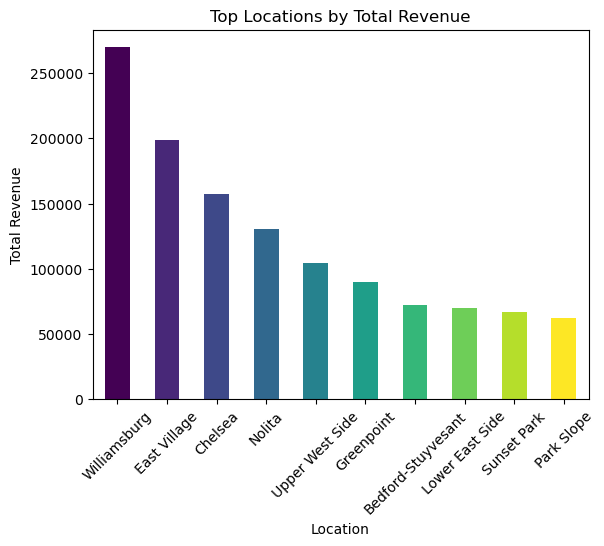

In [161]:
merged = bookings_df.merge(properties_df, on="property_id")

# Group by location and calculate total revenue
total_revenue = merged.groupby("location")["total_price"].sum().sort_values(ascending=False)

# Plot the top locations by total revenue
colors = plt.cm.viridis(np.linspace(0, 1, len(total_revenue.head(10))))  # Generate distinct colors
total_revenue.head(10).plot(kind='bar', color=colors, title='Top Locations by Total Revenue')

plt.ylabel("Total Revenue")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()

In [163]:
merged = property_amenities_df.merge(amenities_df, on="amenity_id")

# Count the number of properties offering each amenity
amenity_counts = merged['amenity_name'].value_counts().head(10)

# Plot the top 10 amenities
colors = plt.cm.cool(np.linspace(0, 1, len(amenity_counts)))  # Generate distinct colors
amenity_counts.plot(kind='bar', color=colors, title='Top 10 Amenities by Number of Properties')

plt.ylabel("Number of Properties")
plt.xlabel("Amenities")
plt.xticks(rotation=60)
plt.show()

NameError: name 'property_amenities_df' is not defined

In [ ]:
merged = properties_df.merge(reviews_df, on="property_id")

# Create the scatter plot
sns.scatterplot(x='listing_price', y='rating_overall', data=merged)

# Add labels and title
plt.title("Correlation Between Property Pricing and User Ratings")
plt.xlabel("Property Price")
plt.ylabel("User Rating")

# Display the plot
plt.show()

In [ ]:
merged = bookings_df.merge(properties_df, on="property_id")

# Calculate average revenue per booking by property type
avg_revenue = merged.groupby("room_type")["total_price"].mean().sort_values()

# Plot the average revenue per booking
colors = plt.cm.Paired(np.linspace(0, 1, len(avg_revenue)))  # Generate distinct colors
avg_revenue.plot(kind='bar', color=colors, title='Average Revenue per Booking by Property Type')

plt.ylabel("Average Revenue")
plt.xlabel("Property Type")
plt.xticks(rotation=0)
plt.show()

In [ ]:
location_counts = properties_df['location'].value_counts()

plt.figure(figsize=(15, 15))
location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Proportion of Properties by Location')

plt.ylabel("")  # Remove default y-axis label
plt.show()